In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


## Завантаження та дослідження датасету

Завантаження набору у датафрейм Pandas та дослідження його характеристик

In [3]:
# https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog/data
df = pd.read_csv('cars.csv')

# Показ перших 5 рядків
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
# Статистика даних (кількість, середнє, стандартне відхилення, мінімальне та максимальне значення)
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [5]:
# Кількітьсть унікальних значень в кожному стовпці
df.nunique()

manufacturer_name      55
model_name           1118
transmission            2
color                  12
odometer_value       6063
year_produced          64
engine_fuel             6
engine_has_gas          2
engine_type             3
engine_capacity        61
body_type              12
has_warranty            2
state                   3
drivetrain              3
price_usd            2677
is_exchangeable         2
location_region         6
number_of_photos       61
up_counter            384
feature_0               2
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
feature_9               2
duration_listed       786
dtype: int64

In [6]:
for c in df.columns:
    print(c + ': ', sorted(df[c].unique()))

manufacturer_name:  ['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Fiat', 'Ford', 'Geely', 'Great Wall', 'Honda', 'Hyundai', 'Infiniti', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lancia', 'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Pontiac', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'ВАЗ', 'ГАЗ', 'ЗАЗ', 'Москвич', 'УАЗ']
model_name:  ['100', '1007', '100NX', '106', '107', '11', '110', '111', '1111', '1119', '112', '116', '118', '12', '120', '121', '125', '1300', '145', '146', '147', '1500', '155', '156', '159', '164', '166', '180', '19', '190', '2', '200', '200-Series', '2008', '200SX', '205', '206', '207', '208', '21', '2101', '21011', '21013', '2102', '2103', '2104', '2105', '2106', '2107', '2108', '2109', '21099', '2110', '2111', '2112', '211

In [7]:
# список брендів з відповідними моделями до кожного бренду
brands = df['manufacturer_name'].unique()
models = []
for brand in brands:
    models.append(df[df['manufacturer_name'] == brand]['model_name'].unique())

for i in range(len(brands)):
    print(brands[i] + ': ', models[i])



Subaru:  ['Outback' 'Forester' 'Impreza' 'Legacy' 'Tribeca' 'Justy' 'XV' 'Leone'
 'WRX' 'Libero']
LADA:  ['Vesta' 'Largus' 'XRAY' '4x4' 'Priora' 'Granta' '111' 'Kalina' '112'
 '110']
Dodge:  ['Dart' 'Stratus' 'Grand Caravan' 'Caravan' 'Intrepid' 'Caliber' 'Neon'
 'Magnum' 'Avenger' 'Journey' 'Durango' 'Van' 'Ram' 'Dakota' 'Stealth'
 'Nitro' 'Challenger' '1500' 'Charger']
УАЗ:  ['452' 'Patriot' '451' '31514' '2206' '3741' '3303' '39099' '469' '31512'
 'Hunter' '3962' '3151']
Kia:  ['Cerato' "Cee'd" 'Sportage' 'Magentis' 'Rio' 'Sorento' 'Optima' 'Clarus'
 'Carens' 'Carnival' 'Avella' 'Retona' 'Sephia' 'Spectra' 'Shuma' 'Joice'
 'Quoris' 'Soul' 'Besta' 'Picanto' "Pro Cee'd" 'Mohave' 'Venga' 'Sedona'
 'Pregio' 'Pride']
Opel:  ['Corsa' 'Insignia' 'Omega' 'Zafira' 'Vectra' 'Signum' 'Astra' 'Meriva'
 'Monterey' 'Movano' 'Vivaro' 'Mokka' 'Antara' 'Combo' 'Sintra' 'Agila'
 'Frontera' 'Kadett' 'Tigra' 'Calibra' 'Ascona' 'Campo' 'Cascada' 'Rekord'
 'Commodore' 'Bedford Blitz' 'Grandland X' 'Kapit

In [8]:
# Перевірка на пропущені значення
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [9]:
# Типи даних в кожному стовпці
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

## Препроцессинг даних

### Робота з пропущеними значеннями

Видаленя тих записів, у яких є відсутні значення

In [10]:
df.dropna(inplace=True)

In [11]:
# перейменування стовпців

df = df.rename(columns={
    'manufacturer_name': 'car_make',
    'model_name': 'car_model',
    'year_produced': 'car_year',
    'odometer_value': 'mileage',
    'color': 'color',
    'engine_type': 'engine_type',
    'engine_capacity': 'engine_displacement',
    'transmission': 'transmission_type',
    'price_usd': 'price',
})

In [12]:
df.head()

,car_make,car_model,transmission_type,color,mileage,car_year,engine_fuel,engine_has_gas,engine_type,engine_displacement,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


### Кодування категоріальних значень

Конвертування категоріальних значень у числові. За допомогою One Hot Encoding

In [15]:
categorical_features  = ['car_make', 'car_model', 'color', 'engine_type', 'transmission_type']
numerical_features = ['car_year', 'engine_displacement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Розбиття даних

Розділення датасету на навчальну і тестові вибірки.

In [16]:
X = df[[
    'car_make',
    'car_model',
    'car_year',
    'mileage',
    'color',
    'engine_type',
    'engine_displacement',
    'transmission_type',
]]

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [17]:
X

,car_make,car_model,car_year,mileage,color,engine_type,engine_displacement,transmission_type
0,Subaru,Outback,2010,190000,silver,gasoline,2.5,automatic
1,Subaru,Outback,2002,290000,blue,gasoline,3.0,automatic
2,Subaru,Forester,2001,402000,red,gasoline,2.5,automatic
3,Subaru,Impreza,1999,10000,blue,gasoline,3.0,mechanical
4,Subaru,Legacy,2001,280000,black,gasoline,2.5,automatic
...,...,...,...,...,...,...,...,...
38526,Chrysler,300,2000,290000,silver,gasoline,3.5,automatic
38527,Chrysler,PT Cruiser,2004,321000,blue,diesel,2.2,mechanical
38528,Chrysler,300,2000,777957,blue,gasoline,3.5,automatic
38529,Chrysler,PT Cruiser,2001,20000,black,gasoline,2.0,mechanical


## Тренування моделей

Конвеєри для різних моделей. Випробовування моделей Linear Regression, Decision Tree, Random Forest, та K-Nearest Neighbors

In [18]:
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', DecisionTreeRegressor(random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(random_state=42))]),
    'K-Nearest Neighbors': Pipeline(steps=[('preprocessor', preprocessor),
                                           ('regressor', KNeighborsRegressor())]),
}

In [19]:
results = {}

for model_name, pipeline in models.items():
    # Wrap the pipeline with TransformedTargetRegressor to scale the target variable
    model = TransformedTargetRegressor(
        regressor=pipeline, transformer=StandardScaler())

    # Train the model
    model.fit(X_train, y_train_scaled)

    # Make predictions on the test set and inverse transform the predictions
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Calculate the performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'RMSE': rmse, 'R^2': r2}
    print(f"{model_name} - RMSE: {rmse}, R^2: {r2}")

Linear Regression - RMSE: 2952.6223119449933, R^2: 0.7813519699636214
Decision Tree - RMSE: 2149.8818571379893, R^2: 0.884079842179296
Random Forest - RMSE: 1839.9902525875293, R^2: 0.9150896132561552
K-Nearest Neighbors - RMSE: 2465.0016871378334, R^2: 0.84760728162578


## Оцінка моделей

Порівняння ефективності за метриками Root Mean Squared Error (RMSE) та R² score.

In [20]:
#####

## Підбір гіперпараметрів

GridSearchCV для пошуку найкращих параметрів для способу із K-Nearest Neighbors

In [23]:
param_grid = {
    'regressor__regressor__n_estimators': [100],
    'regressor__regressor__max_depth': [None, 10],
    'regressor__regressor__min_samples_split': [2, 5],
    'regressor__regressor__min_samples_leaf': [1, 2, 4]
}

# Use the best model from initial evaluation (e.g., Random Forest)
best_initial_model_name = 'Random Forest'
best_initial_model = models[best_initial_model_name]

# Wrap the pipeline with TransformedTargetRegressor to scale the target variable
rf_model = TransformedTargetRegressor(regressor=best_initial_model, transformer=StandardScaler())

# Define the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train_scaled)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set and inverse transform the predictions
y_pred_best_rf_scaled = best_rf_model.predict(X_test)
y_pred_best_rf = scaler_y.inverse_transform(y_pred_best_rf_scaled.reshape(-1, 1)).ravel()

# Calculate and print the performance metrics
print(f"Optimized Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf))}")
print(f"Optimized Random Forest R^2: {r2_score(y_test, y_pred_best_rf)}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters: {'regressor__regressor__max_depth': None, 'regressor__regressor__min_samples_leaf': 1, 'regressor__regressor__min_samples_split': 5, 'regressor__regressor__n_estimators': 100}
Optimized Random Forest RMSE: 1817.7692015238554
Optimized Random Forest R^2: 0.9171281076114185


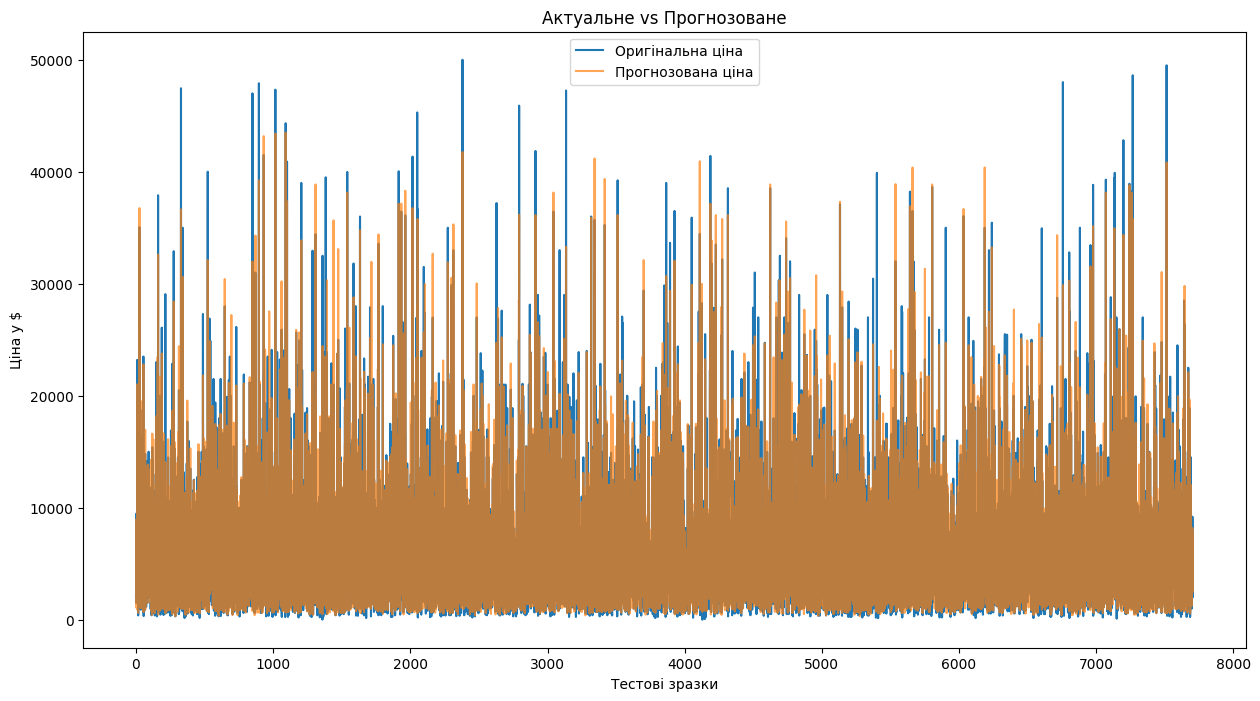

In [29]:
# візуалізація тестових та прогнозованих значень
plt.figure(figsize=(15, 8))

plt.plot(y_test.values, label='Оригінальна ціна ')
plt.plot(y_pred_best_rf, label='Прогнозована ціна', alpha=0.7)
plt.legend()
plt.title('Актуальне vs Прогнозоване')
plt.ylabel('Ціна у $')
plt.xlabel('Тестові зразки')
plt.show()

## Збереження фінальної моделі

In [48]:
import joblib
joblib.dump(best_rf_model, 'car_price_predictor_rf_v2.pkl')
joblib.dump(scaler_y, 'scaler_y_v2.pkl')

# Перевірка моделі
model = joblib.load('car_price_predictor_rf_v2.pkl')

test_data = {
    "car_make": ["Toyota"],
    "car_model": ["Corolla"],
    "car_year": [2010],
    "mileage": [10000],
    "color": ["black"],
    "engine_type": ["petrol"],
    "engine_displacement": [2],
    "transmission_type": ["manual"]
}

test_df = pd.DataFrame(test_data)

print(scaler_y.inverse_transform([model.predict(test_df)]))


[[11604.18428508]]
